Minimum point: [-5.040553313726181, 0.2540723655808412]
Function value: 0.12630793904024332


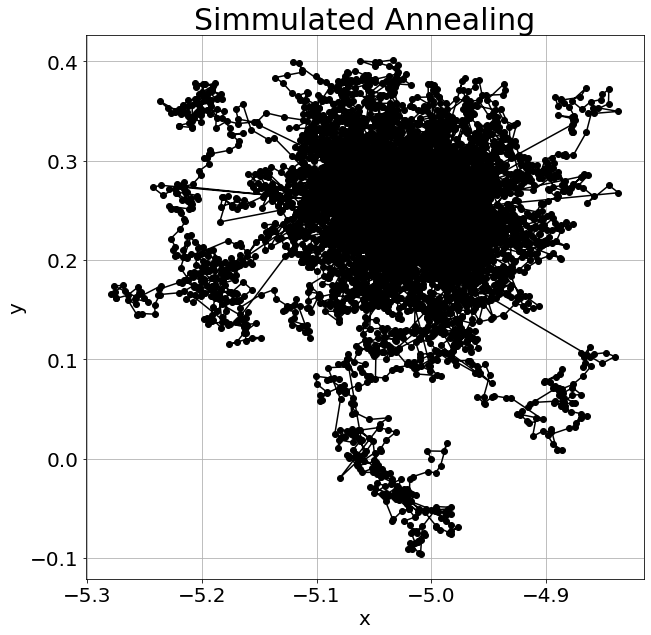

In [8]:
## This code is developed by Sreemannarayana Ikkurthi
## As a part of course notes for the course 15AES477: Multidisciplinary Design Optimization (MDO) 
## In support of Dr. Rajesh Senthil Kumar T., Assistant Professor 
## Department of Aerospace Engneering, Amrita Vishwa Vidyapeetham

################################################# LIBRARIES ###############################################################
import random
import math
import matplotlib.pyplot as plt
###########################################################################################################################

################################################# FUNCTIONS ###############################################################
## BOLTZMAN PROBABILITY FUNCTION
def boltz_prob(del_f, T):
    return math.exp(-del_f/T)

## FUNCTION TO CREATE RANDOM POINT
def rand_point(x, fac):
    def rand_neigh(x, fac):
        if random.randint(0, 1) == 1:
            n_x = x + random.random()*fac
        else:
            n_x = x - random.random()*fac
        return n_x
    rand_x = [rand_neigh(i, fac) for i in x]
    return rand_x

## DIFFERENCE OF FUNCTION VALUES BETWEEN TWO POINTS
def del_fun(x1, x2):
    del_f = f(x2) - f(x1)
    return del_f

## INITIAL TEMPERATURE IN THE NEIGHBOURHOOD OF A POINT
def Temp(x, fac):
    li_f = [f(rand_point(x, fac)) for i in range(10)]
    T = sum(li_f)/len(li_f)
    return T

## DISTANCE BETWEEN TWO POINTS
def dist(x1, x2):
    li = [(x1[i] - x2[i])**2 for i in range(len(x1))]
    del_x = sum(li)**0.5
    return del_x
###########################################################################################################################

################################################# INPUT ARENA #############################################################
## Objective function
def f(x):
    f_v = 100*((abs(x[1] - (0.01*(x[0]**2))))**0.5) + 0.01*(abs(x[0]+10))
    return f_v

ini_x = [-5, 0]    ## INITIAL SEARCH POINT
fac = 0.01         ## FACTOR OF SEARCH
T = Temp(ini_x, 1) ## INITIALIZING TEMPERATURE
t_factor = 0.5     ## TEMPERATURE FACTOR
###########################################################################################################################

############################################# SIMULATED ANNEALING #########################################################
x1 = ini_x 
x2 = rand_point(x1, fac) 
delta = dist(x1, x2)     
del_f = del_fun(x1, x2)
good_x = [x1]            ## LIST OF GOOD POINTS
good_f = [f(x1)]         ## LIST OF FUNCTION VALUES OF GOOD POINTS
while (delta > 0.0001):
    n = 0
    while n < 10000:     ## n FACTOR
        if del_f <= 0:
            good_x.append(x2)
            good_f.append(f(x2))
            x1 = x2
            x2 = rand_point(x1, fac)
        elif (del_f > 0) and (T != 0):
            p = boltz_prob(del_f, T)
            if random.choices([0, 1], weights = [1-p, p]) == [1]:
                x1 = x2
                x2 = rand_point(x1, fac)
            else:
                x2 = good_x[good_f.index(min(good_f))] 
        else:
            x2 = good_x[good_f.index(min(good_f))] 
        del_f = del_fun(x1, x2)
        n += 1    
    T = t_factor*T
    delta = dist(x1, x2)
    
print(f'Minimum point: {x1}')
print(f'Function value: {f(x1)}')
###########################################################################################################################

######################################################## PLOT #############################################################
li_x = [good_x[i][0] for i in range(len(good_x))]
li_y = [good_x[i][1] for i in range(len(good_x))]
#Plotting the figure
plt.figure(figsize = (10, 10))
plt.grid()
plt.plot(li_x, li_y, marker = 'o', color = 'Black')
plt.scatter(li_x[-1], li_y[-1], marker = 'o', s = 200, color = 'Red')
plt.xticks(fontsize = '20')
plt.yticks(fontsize = '20')
plt.xlabel('x', size = '20')
plt.ylabel('y', size = '20')
plt.title('Simmulated Annealing', size = '30')
plt.show()
###########################################################################################################################